In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [5]:
df_bb = pd.read_csv("/content/drive/MyDrive/PYTHON_ML/BigBasket Products.csv")

In [6]:
df_bb.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1.0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2.0,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3.0,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4.0,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5.0,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [7]:
data_types = df_bb.dtypes
print("Data Types of Columns:")
print(data_types)

Data Types of Columns:
index           float64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object


In [8]:
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5990 entries, 0 to 5989
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2500 non-null   float64
 1   product       2500 non-null   object 
 2   category      2500 non-null   object 
 3   sub_category  2500 non-null   object 
 4   brand         2500 non-null   object 
 5   sale_price    2500 non-null   float64
 6   market_price  2500 non-null   float64
 7   type          2500 non-null   object 
 8   rating        1699 non-null   float64
 9   description   2487 non-null   object 
dtypes: float64(4), object(6)
memory usage: 468.1+ KB


In [9]:
df_bb.describe()

,index,sale_price,market_price,rating
count,2500.00000,2500.000000,2500.000000,1699.000000
mean,1250.50000,324.081636,388.506492,3.961801
std,721.83216,509.822782,630.456888,0.710443
min,1.00000,6.000000,7.500000,1.000000
25%,625.75000,90.250000,100.000000,3.800000
50%,1250.50000,185.000000,215.000000,4.100000
75%,1875.25000,350.000000,420.000000,4.300000
max,2500.00000,6999.000000,10695.000000,5.000000


In [10]:
df_bb.isnull().sum()

index           3490
product         3490
category        3490
sub_category    3490
brand           3490
sale_price      3490
market_price    3490
type            3490
rating          4291
description     3503
dtype: int64

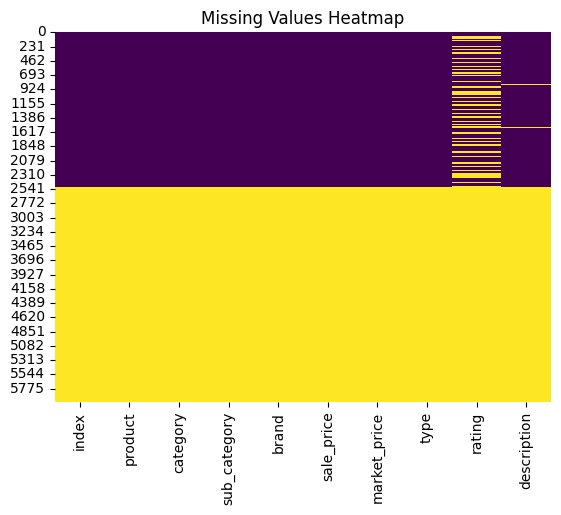

In [11]:
sns.heatmap(df_bb.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [12]:
numerical_cols = df_bb.select_dtypes(include=np.number).columns
df_bb[numerical_cols] = df_bb[numerical_cols].fillna(df_bb[numerical_cols].mean())


In [13]:
categorical_cols = df_bb.select_dtypes(exclude=np.number).columns
df_bb[categorical_cols] = df_bb[categorical_cols].fillna('Unknown')

In [14]:
df_bb.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [15]:
df_bb1 = pd.get_dummies(df_bb, columns=categorical_cols, drop_first=True)

In [16]:
X = df_bb1.drop('sale_price', axis=1)
y = df_bb1['sale_price']


In [17]:
price_bins = [0, 100, 200, np.inf]
price_labels = ['low', 'medium', 'high']
y_categorized = pd.cut(y, bins=price_bins, labels=price_labels)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_categorized, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_cat = scaler.fit_transform(X_train_cat)
X_test_cat = scaler.transform(X_test_cat)

In [20]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

Linear Regression MSE: 4.597455080646958e+24


In [21]:
# 2. Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")

Ridge Regression MSE: 21776.481827249463


In [22]:
# 3. Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")

Lasso Regression MSE: 6769.863728424392


In [23]:
# 4. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cat, y_train_cat)
y_pred_log_reg = log_reg.predict(X_test_cat)
accuracy_log_reg = accuracy_score(y_test_cat, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(classification_report(y_test_cat, y_pred_log_reg))

Logistic Regression Accuracy: 0.845575959933222
              precision    recall  f1-score   support

        high       0.87      0.99      0.92       915
         low       0.77      0.54      0.63       155
      medium       0.54      0.22      0.31       128

    accuracy                           0.85      1198
   macro avg       0.73      0.58      0.62      1198
weighted avg       0.82      0.85      0.82      1198



In [24]:
# 5. Decision Tree Regression
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
print(f"Decision Tree Regression MSE: {mse_dt_reg}")

Decision Tree Regression MSE: 9243.755077920232


In [25]:
# 6. Decision Tree Classification
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_cat, y_train_cat)
y_pred_dt_clf = dt_clf.predict(X_test_cat)
accuracy_dt_clf = accuracy_score(y_test_cat, y_pred_dt_clf)
print(f"Decision Tree Classification Accuracy: {accuracy_dt_clf}")
print(classification_report(y_test_cat, y_pred_dt_clf))

Decision Tree Classification Accuracy: 0.9607679465776294
              precision    recall  f1-score   support

        high       0.98      0.99      0.99       915
         low       0.96      0.91      0.93       155
      medium       0.82      0.81      0.82       128

    accuracy                           0.96      1198
   macro avg       0.92      0.90      0.91      1198
weighted avg       0.96      0.96      0.96      1198



In [26]:
# 7. SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_cat, y_train_cat)
y_pred_svm_poly = svm_poly.predict(X_test_cat)
accuracy_svm_poly = accuracy_score(y_test_cat, y_pred_svm_poly)
print(f"SVM Polynomial Kernel Accuracy: {accuracy_svm_poly}")
print(classification_report(y_test_cat, y_pred_svm_poly))

SVM Polynomial Kernel Accuracy: 0.7654424040066778
              precision    recall  f1-score   support

        high       0.77      1.00      0.87       915
         low       1.00      0.01      0.03       155
      medium       0.00      0.00      0.00       128

    accuracy                           0.77      1198
   macro avg       0.59      0.34      0.30      1198
weighted avg       0.71      0.77      0.67      1198



In [27]:
# 8. SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_cat, y_train_cat)
y_pred_svm_rbf = svm_rbf.predict(X_test_cat)
accuracy_svm_rbf = accuracy_score(y_test_cat, y_pred_svm_rbf)
print(f"SVM RBF Kernel Accuracy: {accuracy_svm_rbf}")
print(classification_report(y_test_cat, y_pred_svm_rbf))

SVM RBF Kernel Accuracy: 0.7712854757929883
              precision    recall  f1-score   support

        high       0.77      1.00      0.87       915
         low       0.82      0.06      0.11       155
      medium       0.00      0.00      0.00       128

    accuracy                           0.77      1198
   macro avg       0.53      0.35      0.33      1198
weighted avg       0.69      0.77      0.68      1198



In [28]:
print(f"Linear Regression MSE: {mse_lr}")
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Decision Tree Regression MSE: {mse_dt_reg}")
print(f"Decision Tree Classification Accuracy: {accuracy_dt_clf}")
print(f"SVM Polynomial Kernel Accuracy: {accuracy_svm_poly}")
print(f"SVM RBF Kernel Accuracy: {accuracy_svm_rbf}")


Linear Regression MSE: 4.597455080646958e+24
Ridge Regression MSE: 21776.481827249463
Lasso Regression MSE: 6769.863728424392
Logistic Regression Accuracy: 0.845575959933222
Decision Tree Regression MSE: 9243.755077920232
Decision Tree Classification Accuracy: 0.9607679465776294
SVM Polynomial Kernel Accuracy: 0.7654424040066778
SVM RBF Kernel Accuracy: 0.7712854757929883


In [29]:
best_model = min((mse_lr, 'Linear Regression'),
                 (mse_ridge, 'Ridge Regression'),
                 (mse_lasso, 'Lasso Regression'),
                 (1-accuracy_log_reg, 'Logistic Regression'),
                 (mse_dt_reg, 'Decision Tree Regression'),
                 (1-accuracy_dt_clf, 'Decision Tree Classification'),
                 (1-accuracy_svm_poly, 'SVM Polynomial Kernel'),
                 (1-accuracy_svm_rbf, 'SVM RBF Kernel'))

print(f"Best Model: {best_model[1]} with score: {best_model[0]}")

Best Model: Decision Tree Classification with score: 0.03923205342237057
